In [1]:
"""
Upward or downward trend of Google stock price

TRAIN DATA : 2012-2016 google stock price

TEST DATA : First month of January 2017
"""

'\nUpward or downward trend of Google stock price\n\nTRAIN DATA : 2012-2016 google stock price\n\nTEST DATA : First month of January 2017\n'

We will predict the open stock price on jan 2017 , training will be done on Train set open stck price

# Data Preprocessing

In [2]:
#importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#import the training set ( the model will not know the test set , 
#so importing only the training set)
#take the dataset using pandas into dataframe
#convert into numpy array because only numpy array can be input to keras

In [4]:
#inserting the training set
dataset_train=pd.read_csv('Google_Stock_Price_Train.csv')
dataset_train.describe()
dataset_train.info()
dataset_train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [5]:
#input to NN as numpy array
#select the right index to fed to NN
#with only the column open of the google stock price
training_set=dataset_train.iloc[:,1:2]
training_set

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04
...,...
1253,790.90
1254,790.68
1255,793.70
1256,783.33


In [6]:
#make it a numpy array
training_set.values

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [13]:
#Feature scaling : normalization
#norm(x)=x-min(x)/max(x)-min(x) hence it will be between 0 and 1
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [14]:
#Create a datastructure with 60 timestamp and 1 output
#small time stamp leads to overfitting
#60 prev financial days to learn and predict the next day
X_train=[]
y_train=[]
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])

    
X_train,y_train=np.array(X_train),np.array(y_train)
X_train
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [15]:
#Reshaping : adding a dimension in a numpy array
#do this for x_train
#to craete new dimensionality that is expected in future neural network
#hence input of NN shape 
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [16]:
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

# LSTM , building RNN

In [11]:
#stacked LSTM , robust , with dropout regularization to prevent overfitting

In [17]:
#importing the keras libraries and packages
import tensorflow as tf
tf.__version__

'2.14.0'

In [20]:
import keras
keras.__version__

'2.14.0'

In [34]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [35]:
#initialize the RNN
# a sequence of layers using sequential class from keras.models
predictor=Sequential() #regressor:predicting a sequential value

In [36]:
#adding the first LSTM layer and some Dropuout regualarization
predictor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
predictor.add(Dropout(rate=0.2))

In [37]:
#second LSTM layer
predictor.add(LSTM(units=50,return_sequences=True))
predictor.add(Dropout(rate=0.2)) # 10 neuron will be dropped
#Third LSTM layer
predictor.add(LSTM(units=50,return_sequences=True))
predictor.add(Dropout(rate=0.2)) # 10 neuron will be dropped
#-------------------------------------------------------------




#The fourth LSTM layer , The las layer hence no sequences
predictor.add(LSTM(units=50,return_sequences=False))
predictor.add(Dropout(rate=0.2))


#THE FINAL OUTPUT LAYER
predictor.add(Dense(units=1))


# COMPILING THE RNN

In [38]:
predictor.compile(optimizer='adam',loss='mean_squared_error')

# FITTING THE RNN TO TRAINING SET

In [39]:
#imput of the neural network :X_train
#compare with the ground truth : y_train
#how many iterations , whole training data to forward prop and backprop to update the weights
#batch_size :32 
predictor.fit(x=X_train,y=y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 15s 110ms/step - loss: 0.0465
Epoch 2/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0059
Epoch 3/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0060
Epoch 4/100
38/38 [==============================] - 4s 100ms/step - loss: 0.0058
Epoch 5/100
38/38 [==============================] - 4s 103ms/step - loss: 0.0059
Epoch 6/100
38/38 [==============================] - 4s 105ms/step - loss: 0.0047
Epoch 7/100
38/38 [==============================] - 4s 105ms/step - loss: 0.0053
Epoch 8/100
38/38 [==============================] - 4s 103ms/step - loss: 0.0047
Epoch 9/100
38/38 [==============================] - 4s 96ms/step - loss: 0.0046
Epoch 10/100
38/38 [==============================] - 4s 101ms/step - loss: 0.0046
Epoch 11/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0042
Epoch 12/100
38/38 [==============================] - 4s 97ms/step - loss: 0.0041
Epoch 13/100
3

# PREDICTIONS AND VISUALIZATION

In [42]:
#getting the real stock price of JAN 2017
dataset_test=pd.read_csv('Google_Stock_Price_Test.csv')
dataset_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [65]:
#REAL STOCK PRICE of 2017
real_stock_price=dataset_test.iloc[:,1:2].values
real_stock_price.shape[0] #20 day stock price

20

In [66]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [46]:
#now we are predicting stock price based on 60 previous days stock price
#hence we need data for 60 previous days
#we need some concatenation because some data are from training set
#some are from test set

In [67]:
dataset_total=pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
dataset_total

0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
       ...  
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, Length: 1278, dtype: float64

In [68]:
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs
#all the stock price of jan 2017

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [69]:
inputs=inputs.reshape(-1,1)#-1 th index in 1 column
inputs

array([[779.  ],
       [779.66],
       [777.71],
       [786.66],
       [783.76],
       [781.22],
       [781.65],
       [779.8 ],
       [787.85],
       [798.24],
       [803.3 ],
       [795.  ],
       [804.9 ],
       [816.68],
       [806.34],
       [801.  ],
       [808.35],
       [795.47],
       [782.89],
       [778.2 ],
       [767.25],
       [750.66],
       [774.5 ],
       [783.4 ],
       [779.94],
       [791.17],
       [756.54],
       [755.6 ],
       [746.97],
       [755.2 ],
       [766.92],
       [771.37],
       [762.61],
       [772.63],
       [767.73],
       [764.26],
       [760.  ],
       [771.53],
       [770.07],
       [757.44],
       [744.59],
       [757.71],
       [764.73],
       [761.  ],
       [772.48],
       [780.  ],
       [785.04],
       [793.9 ],
       [797.4 ],
       [797.34],
       [800.4 ],
       [790.22],
       [796.76],
       [795.84],
       [792.36],
       [790.9 ],
       [790.68],
       [793.7 ],
       [783.33

In [70]:
inputs=sc.transform(inputs)
inputs
X_test=[]
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test

array([[0.9299055 , 0.93113327, 0.92750577, ..., 0.95725128, 0.93796041,
        0.93688146],
       [0.93113327, 0.92750577, 0.94415507, ..., 0.93796041, 0.93688146,
        0.92955205],
       [0.92750577, 0.94415507, 0.93876032, ..., 0.93688146, 0.92955205,
        0.94731751],
       ...,
       [0.96054394, 0.9371419 , 0.92841729, ..., 1.01045465, 1.02407173,
        1.03930724],
       [0.9371419 , 0.92841729, 0.90804747, ..., 1.02407173, 1.03930724,
        1.03354044],
       [0.92841729, 0.90804747, 0.8771858 , ..., 1.03930724, 1.03354044,
        0.99624228]])

In [71]:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test

array([[[0.9299055 ],
        [0.93113327],
        [0.92750577],
        ...,
        [0.95725128],
        [0.93796041],
        [0.93688146]],

       [[0.93113327],
        [0.92750577],
        [0.94415507],
        ...,
        [0.93796041],
        [0.93688146],
        [0.92955205]],

       [[0.92750577],
        [0.94415507],
        [0.93876032],
        ...,
        [0.93688146],
        [0.92955205],
        [0.94731751]],

       ...,

       [[0.96054394],
        [0.9371419 ],
        [0.92841729],
        ...,
        [1.01045465],
        [1.02407173],
        [1.03930724]],

       [[0.9371419 ],
        [0.92841729],
        [0.90804747],
        ...,
        [1.02407173],
        [1.03930724],
        [1.03354044]],

       [[0.92841729],
        [0.90804747],
        [0.8771858 ],
        ...,
        [1.03930724],
        [1.03354044],
        [0.99624228]]])

In [72]:
predicted_stock_price=predictor.predict(X_test)
predicted_stock_price

1/1 [==============================] - 0s 60ms/step


array([[0.92744243],
       [0.92240024],
       [0.9226925 ],
       [0.92520094],
       [0.93119913],
       [0.94175816],
       [0.95154506],
       [0.9556942 ],
       [0.9564404 ],
       [0.95611435],
       [0.95580006],
       [0.9554567 ],
       [0.95519304],
       [0.9561093 ],
       [0.9577565 ],
       [0.9658874 ],
       [0.9782655 ],
       [0.991637  ],
       [0.99905753],
       [0.9919842 ]], dtype=float32)

In [73]:
#inverse
predicted_stock_price=sc.inverse_transform(predicted_stock_price)
predicted_stock_price

array([[777.6759 ],
       [774.96545],
       [775.12256],
       [776.471  ],
       [779.69543],
       [785.37146],
       [790.63257],
       [792.863  ],
       [793.2641 ],
       [793.08887],
       [792.91986],
       [792.7353 ],
       [792.59357],
       [793.08606],
       [793.97156],
       [798.3424 ],
       [804.9964 ],
       [812.1843 ],
       [816.17334],
       [812.37103]], dtype=float32)

# VISUALIZATION OF PREDICTION

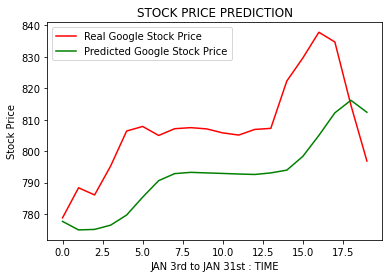

In [75]:
import matplotlib.pyplot as plt
plt.plot(real_stock_price,color='red',label='Real Google Stock Price')
plt.plot(predicted_stock_price,color='green',label='Predicted Google Stock Price')
plt.title('STOCK PRICE PREDICTION')
plt.xlabel('JAN 3rd to JAN 31st : TIME')
plt.ylabel('Stock Price')
plt.legend()
plt.show()